In [1]:
import numpy as np, matplotlib.pyplot as plt
from importlib import reload
import cvflow as cf
% matplotlib inline

In [2]:
import laneFindingPipeline
reload(laneFindingPipeline);

In [3]:
laneFinder = laneFindingPipeline.LaneFinder(colorFilter=cf.SimplePipeline())

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))


uint8


In [4]:
allFrames = laneFindingPipeline.utils.loadFrames(videoPrefices=('project',), maxframes=32)

HBox(children=(IntProgress(value=0, description='load project: ', max=32), HTML(value='')))

In [5]:
frame = allFrames['project'][0]

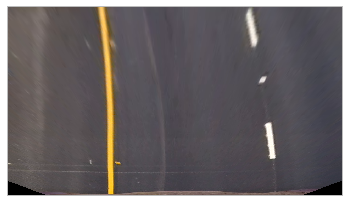

In [6]:
cf.misc.show(laneFinder.colorFilter.getMembersByType(cf.workers.Perspective).perspectiveTransformer(frame));

In [7]:
laneFinder.colorFilter.colorOutput.parents[0].value.dtype

dtype('uint8')

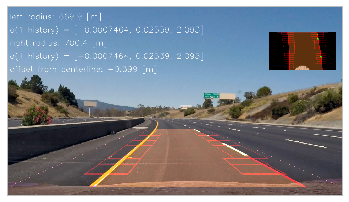

In [8]:
# from utils import bk; bk()
cf.misc.show(laneFinder.draw(frame));

In [9]:
import utils
reload(utils);

In [10]:
%load_ext line_profiler

In [11]:
laneFinder.colorFilter.colorOutput.value

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ..., 
       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
%prun -s cumtime utils.transformVideo(allFrames['project'], 'cf-%s.mp4' % laneFinder.colorFilter, laneFinder.draw)

HBox(children=(IntProgress(value=0, description='cf-SimplePipeline.mp4: ', max=32), HTML(value='')))

In [13]:
# utils.transformVideo('project_video.mp4', 'cf-%s.mp4' % laneFinder.colorFilter, laneFinder.draw)